## Multi-class Dataset

Whereas binary classification involves classifying something into one of two classes (e.g. "black" or "white", "dead" or "alive", etc), multiclass problems involve classifying something (e.g. a coordinate) into one of N classes (e.g. "red", "white" or "blue").  For example, Intent classification (classifying a sentence into one of N intents) is a common use-case in Natural Language Processing (NLP) for multi-class classification.  This tutorial will show you some tips and tricks to improve your multi-class classification results

--2019-04-28 10:14:15--  https://raw.githubusercontent.com/mohammedterry/ANNs/master/captainamerica.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27198 (27K) [text/plain]
Saving to: ‘captainamerica.py’

captainamerica.py   100%[===================>]  26.56K  --.-KB/s    in 0.007s  

2019-04-28 10:14:15 (3.84 MB/s) - ‘captainamerica.py’ saved [27198/27198]



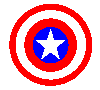

In [ ]:
!wget https://raw.githubusercontent.com/mohammedterry/ANNs/master/captainamerica.py
from captainamerica import multiclass_data

RED = [255,0,0]
WHITE = [255,255,255]
BLUE = [0,0,255]

x = len(multiclass_data)
y = len(multiclass_data[0])
z = len(RED)
n_classes = 3

import numpy as np
image_array = np.zeros((x,y,z), np.uint8)

for row,classes in enumerate(multiclass_data):
  for column,rwb in enumerate(classes):
    image_array[row][column] = [WHITE,RED,BLUE][rwb]

from PIL import Image
Image.fromarray(image_array)

In [ ]:
def one_hot(i, vec_len):
  vector = [0]*vec_len
  vector[i] = 1
  return vector

training_inputs = [(xx,yy) for xx in range(x) for yy in range(y)]
training_outputs = [one_hot(c, z) for row in multiclass_data for c in row]

training_outputs_labels = [c for row in multiclass_data for c in row]
labels = set(training_outputs_labels)

## Evaluation Metrics

We shall have a visual method to qualitatively evaluate each model via visual inspection

In [ ]:
def format_prediction(predicted_outputs):
  predicted_image_array = np.zeros_like(image_array)
  i = 0
  for row,pixels in enumerate(predicted_image_array):
    for column in range(len(pixels)):
      p = np.argmax(predicted_outputs[i])
      predicted_image_array[row][column] = [WHITE,RED,BLUE][p]
      i += 1
  return predicted_image_array

We shall also use metrics (Precision, Recall, F1, Confusion Matrix) to quantitatively evaluate each model and how well they are classifying each class (taking into account unbalanced data) and see which classes the model is confusing with one another



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  cmat.set_index([pd.Index(labels, '')],inplace=True)
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")

## Inherently Multiclass Classifiers

Not all algorithms can support multi-class classification.  Here are some which do

### Shallow FeedForward Neural Network

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.68      0.94      0.79      5608
           1       0.73      0.25      0.38      2698
           2       0.72      0.38      0.49       694

   micro avg       0.69      0.69      0.69      9000
   macro avg       0.71      0.52      0.55      9000
weighted avg       0.70      0.69      0.64      9000



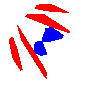

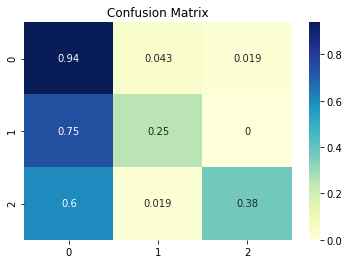

In [ ]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(training_inputs, training_outputs)

snn_predictions = snn_classifier.predict(training_inputs)
snn_predictions_labels = [np.argmax(p) for p in snn_predictions]
evaluate(training_outputs_labels, snn_predictions_labels, labels)
Image.fromarray(format_prediction(snn_predictions))              

### Deep FeedForward Neural Network

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5608
           1       0.96      0.93      0.95      2698
           2       0.89      0.94      0.91       694

   micro avg       0.96      0.96      0.96      9000
   macro avg       0.94      0.95      0.94      9000
weighted avg       0.96      0.96      0.96      9000



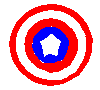

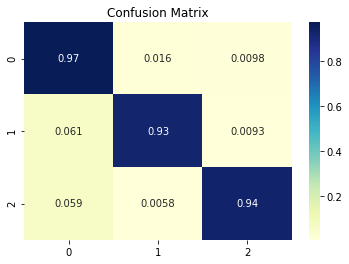

In [ ]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(training_inputs, training_outputs)

dnn_predictions = dnn_classifier.predict(training_inputs)
dnn_predictions_labels = [np.argmax(p) for p in dnn_predictions]
evaluate(training_outputs_labels, dnn_predictions_labels, labels)
Image.fromarray(format_prediction(dnn_predictions))              

### Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      2698
           2       1.00      1.00      1.00       694

   micro avg       1.00      1.00      1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



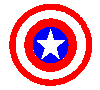

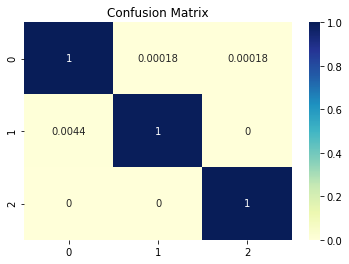

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(training_inputs, training_outputs)

rf_predictions = rf_classifier.predict(training_inputs)
rf_predictions_labels = [np.argmax(p) for p in rf_predictions]
evaluate(training_outputs_labels, rf_predictions_labels, labels)
Image.fromarray(format_prediction(rf_predictions))              

### KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      2698
           2       0.99      1.00      1.00       694

   micro avg       1.00      1.00      1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



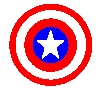

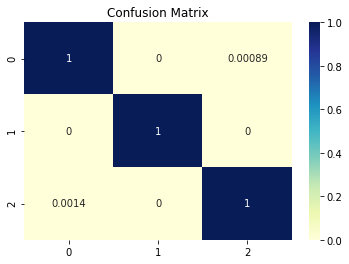

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(training_inputs, training_outputs)

knn_predictions = knn_classifier.predict(training_inputs)
knn_predictions_labels = [np.argmax(p) for p in knn_predictions]
evaluate(training_outputs_labels, knn_predictions_labels, labels)
Image.fromarray(format_prediction(knn_predictions))              

## Ensemble of Binary Classifiers (One vs Rest)

Even then, these models are mostly limited to a handful of classes and will struggle to classify a large amount of classes.  If you have a lot of classes, an alternative method is to train a binary classifier for each class (which is easier and so should be better accuracy) and combine the classifiers' outputs as an ensemble method (this is the one-vs-rest approach).   

### Deep FeedForward Neural Networks

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5608
           1       0.99      0.95      0.97      2698
           2       0.90      0.89      0.89       694

   micro avg       0.97      0.97      0.97      9000
   macro avg       0.95      0.94      0.95      9000
weighted avg       0.97      0.97      0.97      9000



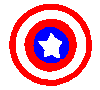

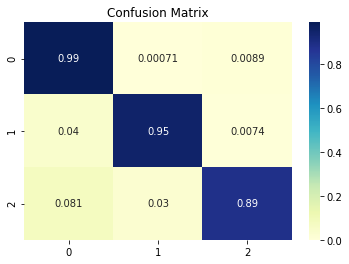

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(np.array(training_inputs), training_outputs_labels)

dnns_predictions_labels = dnns_classifier.predict(training_inputs)
evaluate(training_outputs_labels, dnns_predictions_labels, labels)
dnns_predictions = [one_hot(p,z) for p in dnns_predictions_labels]
Image.fromarray(format_prediction(dnns_predictions))

### XGBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      2698
           2       0.99      0.99      0.99       694

   micro avg       1.00      1.00      1.00      9000
   macro avg       0.99      1.00      0.99      9000
weighted avg       1.00      1.00      1.00      9000



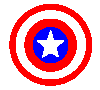

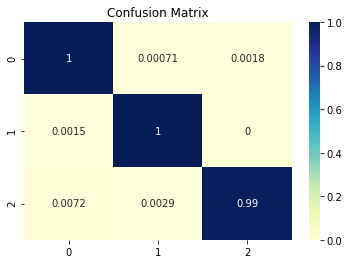

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(np.array(training_inputs), training_outputs_labels)

xgb_predictions_labels = xgb_classifier.predict(training_inputs)
evaluate(training_outputs_labels, xgb_predictions_labels, labels)
xgb_predictions = [one_hot(p,z) for p in xgb_predictions_labels]
Image.fromarray(format_prediction(xgb_predictions))

### SVM

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00      2698
           2       1.00      1.00      1.00       694

   micro avg       1.00      1.00      1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



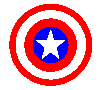

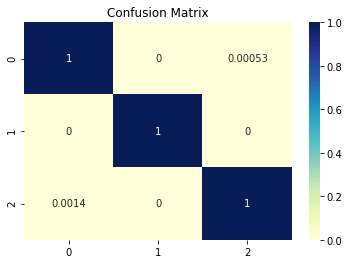

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(training_inputs, training_outputs_labels)

svm_predictions_labels = svm_classifier.predict(training_inputs)
evaluate(training_outputs_labels, svm_predictions_labels, labels)
svm_predictions = [one_hot(p,z) for p in svm_predictions_labels]
Image.fromarray(format_prediction(svm_predictions))

## Unbalanced Dataset

Sometimes the data can be biased toward one or two classes with a lot of data, and another may have nearly none!  Therefore, the classifier(s) will have a lot of examples for some classes and not really learn the smaller class that well. 

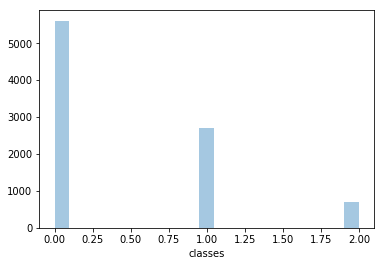

In [ ]:
sns.distplot(pd.Series(training_outputs_labels, name="classes"), kde=False)

### Sub-Sampling

This method is not recommended as it throws away a lot of data

In [ ]:
classes = {}
for i,c in enumerate(training_outputs_labels):
  if c in classes:
    classes[c].append(i)
  else:
    classes[c] = [i]

class_sizes = [len(c) for c in classes.values()]
smallest_class_size = min(class_sizes)

import random
ids = [random.sample(c,smallest_class_size) for c in classes.values()]
subsampled_training_inputs = [training_inputs[i] for c in ids for i in c]
subsampled_training_outputs = [training_outputs[i] for c in ids for i in c]
subsampled_training_outputs_labels = [training_outputs_labels[i] for c in ids for i in c]

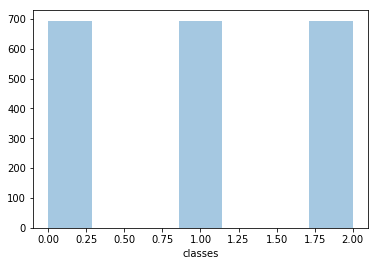

In [ ]:
sns.distplot(pd.Series(subsampled_training_outputs_labels, name="classes"), kde=False)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      5608
           1       0.66      0.62      0.64      2698
           2       0.52      1.00      0.69       694

   micro avg       0.75      0.75      0.75      9000
   macro avg       0.68      0.80      0.72      9000
weighted avg       0.77      0.75      0.76      9000



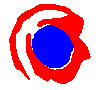

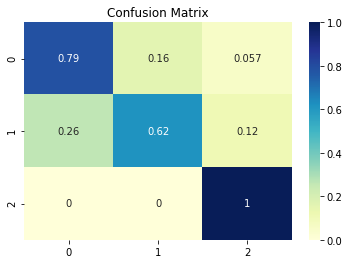

In [ ]:
dnn_classifier2 = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier2.fit(subsampled_training_inputs, subsampled_training_outputs)

dnn_predictions2 = dnn_classifier2.predict(training_inputs)
dnn_predictions_labels2 = [np.argmax(p) for p in dnn_predictions2]
evaluate(training_outputs_labels, dnn_predictions_labels2, labels)
Image.fromarray(format_prediction(dnn_predictions2))  

### Upsampling

In [ ]:
largest_class_size = max(class_sizes)

import random
ids = [[random.choice(c) for _ in range(largest_class_size - len(c))] for c in classes.values()]
upsampled_training_inputs = [training_inputs[i] for c in ids for i in c]
upsampled_training_outputs = [training_outputs[i] for c in ids for i in c]
upsampled_training_outputs_labels = [training_outputs_labels[i] for c in ids for i in c]

upsampled_training_inputs += training_inputs
upsampled_training_outputs += training_outputs
upsampled_training_outputs_labels += training_outputs_labels

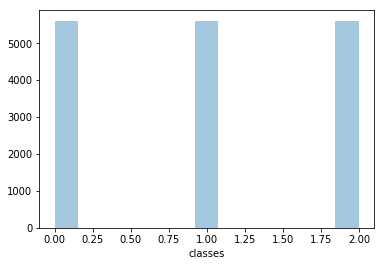

In [ ]:
sns.distplot(pd.Series(upsampled_training_outputs_labels, name="classes"), kde=False)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5608
           1       0.77      0.79      0.78      2698
           2       0.67      1.00      0.80       694

   micro avg       0.85      0.85      0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.86      0.85      0.85      9000



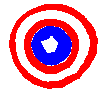

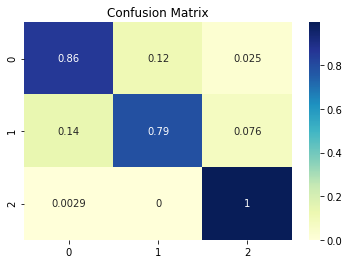

In [ ]:
dnn_classifier3 = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier3.fit(upsampled_training_inputs, upsampled_training_outputs)

dnn_predictions3 = dnn_classifier3.predict(training_inputs)
dnn_predictions_labels3 = [np.argmax(p) for p in dnn_predictions3]
evaluate(training_outputs_labels, dnn_predictions_labels3, labels)
Image.fromarray(format_prediction(dnn_predictions3))  

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_training_inputs, resampled_training_outputs_labels = sm.fit_resample(training_inputs, training_outputs_labels)
resampled_training_outputs = [one_hot(c,z) for c in resampled_training_outputs_labels]

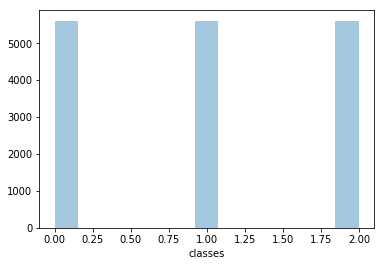

In [ ]:
sns.distplot(pd.Series(resampled_training_outputs_labels, name="classes"), kde=False)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5608
           1       0.72      0.83      0.77      2698
           2       0.70      0.97      0.81       694

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.78      0.87      0.82      9000
weighted avg       0.85      0.83      0.84      9000



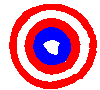

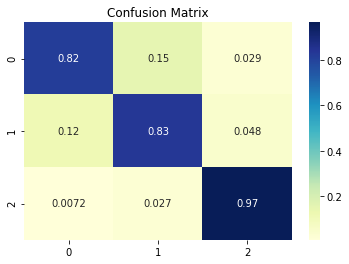

In [ ]:
dnn_classifier4 = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier4.fit(resampled_training_inputs, resampled_training_outputs)

dnn_predictions4 = dnn_classifier4.predict(training_inputs)
dnn_predictions_labels4 = [np.argmax(p) for p in dnn_predictions4]
evaluate(training_outputs_labels, dnn_predictions_labels4, labels)
Image.fromarray(format_prediction(dnn_predictions4))  

## Multiclass Classification without a Classifier!

Lets embed the class labels into the same space as the training data. We can do that by taking the average of the vectors for each class. This is equivalent to taking the centroid of each classes vector cluster.

In [ ]:
clusters = {this_class:[training_inputs[i] for i,c in enumerate(training_outputs_labels) if c == this_class] for this_class in range(n_classes)}
centroids = [np.mean(np.array(vectors), axis=0) for vectors in clusters.values()]

Now lets take a look at the cluster centroids for each class

In [ ]:
def plot_class_centroid(c):
  class_vectors = list(clusters.values())[c]
  class_label_vector = centroids[c]

  X = [x for x,_ in class_vectors + [class_label_vector]]
  Y = [y for _,y in class_vectors + [class_label_vector]]
  colours = ([c] * (len(X) - 1)) + [c+1]
  sizes = ([10] * (len(X) - 1)) + [len(X)]

  plt.scatter(X, Y, s = sizes, c= colours, alpha=0.5)

In [ ]:
plot_class_centroid(0)
centroids[0]

In [ ]:
plot_class_centroid(1)
centroids[1]

In [ ]:
plot_class_centroid(2)
centroids[2]

Now to predict the class for a new pixel, you compare its vector to the vector for each class label (using a metric like cosine similarity) and return the closest match as the predicted class label

In [ ]:
from scipy.spatial.distance import cosine

def predict_class(vector, class_vectors):
  scores = [(cosine(vector, class_vector),c) for c,class_vector in enumerate(class_vectors)]
  ranked = [c for _,c in sorted(scores)]
  return ranked[0]

In [ ]:
predict_class([40,50], centroids)

In [ ]:
centroid_predictions_labels = [predict_class(xy, centroids) for xy in training_inputs]
evaluate(training_outputs_labels, centroid_predictions_labels, labels)

centroid_predictions = [one_hot(p, z) for p in centroid_predictions_labels]
Image.fromarray(format_prediction(centroid_predictions))  